# Data Preprocessing and Feature Engineering in Machine Learning

**1. Data Exploration and Preprocessing:**

In [50]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer

In [51]:
dataset = pd.read_csv('/content/adult_with_headers.csv')

In [52]:
df = pd.DataFrame(dataset)

In [53]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [54]:
# Display the first few rows of the DataFrame
print("First few rows of the DataFrame:")
print(df.head())


First few rows of the DataFrame:
   age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0          2174             0      

In [55]:
print(df.tail())

       age      workclass  fnlwgt    education  education_num  \
32556   27        Private  257302   Assoc-acdm             12   
32557   40        Private  154374      HS-grad              9   
32558   58        Private  151910      HS-grad              9   
32559   22        Private  201490      HS-grad              9   
32560   52   Self-emp-inc  287927      HS-grad              9   

            marital_status          occupation relationship    race      sex  \
32556   Married-civ-spouse        Tech-support         Wife   White   Female   
32557   Married-civ-spouse   Machine-op-inspct      Husband   White     Male   
32558              Widowed        Adm-clerical    Unmarried   White   Female   
32559        Never-married        Adm-clerical    Own-child   White     Male   
32560   Married-civ-spouse     Exec-managerial         Wife   White   Female   

       capital_gain  capital_loss  hours_per_week  native_country  income  
32556             0             0              38   

In [56]:
# Summary statistics for numerical columns
print("\nSummary statistics for numerical columns:")
print(df.describe())


Summary statistics for numerical columns:
                age        fnlwgt  education_num  capital_gain  capital_loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


In [57]:
# Data types of each column
print("\nData types of each column:")
print(df.dtypes)


Data types of each column:
age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object


In [58]:
print(df.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')


In [59]:
# Missing values in each column
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


In [60]:
# Overall info about the DataFrame
print("\nOverall info about the DataFrame:")
print(df.info())


Overall info about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [61]:
# 1. Remove rows with missing values
df_dropped = df.dropna()
print("\nDataFrame after dropping rows with missing values:")
print(df_dropped)


DataFrame after dropping rows with missing values:
       age          workclass  fnlwgt    education  education_num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital_status          occupation    relationship    race  \
0            Never-married        Adm-clerica

In [62]:
# 2. Remove columns with missing values
df_dropped_cols = df.dropna(axis=1)
print("\nDataFrame after dropping columns with missing values:")
print(df_dropped_cols)


DataFrame after dropping columns with missing values:
       age          workclass  fnlwgt    education  education_num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital_status          occupation    relationship    race  \
0            Never-married        Adm-cler

In [63]:
# 3. Fill missing values with a specific value (e.g., 'Unknown' for strings, 0 for numbers)
df_filled = df.fillna({
    'Name': 'Unknown',
    'Age': 0,
    'Salary': 0,
    'City': 'Unknown'
})
print("\nDataFrame after filling missing values with specific values:")
print(df_filled)


DataFrame after filling missing values with specific values:
       age          workclass  fnlwgt    education  education_num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital_status          occupation    relationship    race  \
0            Never-married        A

In [64]:
# 3. Fill missing values with default values
def fill_missing_values(df, default_values):
    return df.fillna(default_values)

# 4. Impute missing values (mean for numeric, mode for categorical)
def impute_missing_values(df):
    df_imputed = df.copy()
    for column in df_imputed.columns:
        if df_imputed[column].dtype in [np.float64, np.int64]:
            df_imputed[column].fillna(df_imputed[column].mean(), inplace=True)
        else:
            df_imputed[column].fillna(df_imputed[column].mode()[0], inplace=True)
    return df_imputed

In [65]:
# Identify numerical features for scaling
numerical_features = df.select_dtypes(include=np.number).columns.tolist()


In [66]:
# Standard Scaling (Only apply to numerical features)
standard_scaler = StandardScaler()
df_standard_scaled = df.copy()  # Create a copy to avoid modifying the original DataFrame
df_standard_scaled[numerical_features] = standard_scaler.fit_transform(df_standard_scaled[numerical_features])  # Apply to numerical features only

# Print Scaled Data
print("\nStandard Scaled Data:")
print(df_standard_scaled.head())


Standard Scaled Data:
        age          workclass    fnlwgt   education  education_num  \
0  0.030671          State-gov -1.063611   Bachelors       1.134739   
1  0.837109   Self-emp-not-inc -1.008707   Bachelors       1.134739   
2 -0.042642            Private  0.245079     HS-grad      -0.420060   
3  1.057047            Private  0.425801        11th      -1.197459   
4 -0.775768            Private  1.408176   Bachelors       1.134739   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0  

In [67]:
# Min-Max Scaling (Only apply to numerical features)
minmax_scaler = MinMaxScaler()
df_minmax_scaled = df.copy()  # Create a copy to avoid modifying the original DataFrame
df_minmax_scaled[numerical_features] = minmax_scaler.fit_transform(df_minmax_scaled[numerical_features])  # Apply to numerical features only

print("\nMin-Max Scaled Data:")
print(df_minmax_scaled.head())


Min-Max Scaled Data:
        age          workclass    fnlwgt   education  education_num  \
0  0.301370          State-gov  0.044302   Bachelors       0.800000   
1  0.452055   Self-emp-not-inc  0.048238   Bachelors       0.800000   
2  0.287671            Private  0.138113     HS-grad       0.533333   
3  0.493151            Private  0.151068        11th       0.400000   
4  0.150685            Private  0.221488   Bachelors       0.800000   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0   

In [68]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler , RobustScaler , MaxAbsScaler

In [69]:
# Apply Min-Max Scaling
min_max_scaler = MinMaxScaler()

# Select only numerical columns from the DataFrame
numerical_df = df.select_dtypes(include=np.number)

# Apply MinMaxScaler to the numerical features
df_min_max = pd.DataFrame(min_max_scaler.fit_transform(numerical_df),
                          columns=numerical_df.columns,
                          index=df.index)  # Keep original index

print("\nMin-Max Scaled Data:")
print(df_min_max)



Min-Max Scaled Data:
            age    fnlwgt  education_num  capital_gain  capital_loss  \
0      0.301370  0.044302       0.800000      0.021740           0.0   
1      0.452055  0.048238       0.800000      0.000000           0.0   
2      0.287671  0.138113       0.533333      0.000000           0.0   
3      0.493151  0.151068       0.400000      0.000000           0.0   
4      0.150685  0.221488       0.800000      0.000000           0.0   
...         ...       ...            ...           ...           ...   
32556  0.136986  0.166404       0.733333      0.000000           0.0   
32557  0.315068  0.096500       0.533333      0.000000           0.0   
32558  0.561644  0.094827       0.533333      0.000000           0.0   
32559  0.068493  0.128499       0.533333      0.000000           0.0   
32560  0.479452  0.187203       0.533333      0.150242           0.0   

       hours_per_week  
0            0.397959  
1            0.122449  
2            0.397959  
3            0.39

In [70]:
# Apply Standardization (Only to numerical features)
standard_scaler = StandardScaler()

# Select only numerical columns from the DataFrame
numerical_df = df.select_dtypes(include=np.number)

# Apply StandardScaler to the numerical features
df_standard = pd.DataFrame(standard_scaler.fit_transform(numerical_df),
                          columns=numerical_df.columns,
                          index=df.index)  # Keep original index

print("\nStandardized Data:")
print(df_standard)


Standardized Data:
            age    fnlwgt  education_num  capital_gain  capital_loss  \
0      0.030671 -1.063611       1.134739      0.148453      -0.21666   
1      0.837109 -1.008707       1.134739     -0.145920      -0.21666   
2     -0.042642  0.245079      -0.420060     -0.145920      -0.21666   
3      1.057047  0.425801      -1.197459     -0.145920      -0.21666   
4     -0.775768  1.408176       1.134739     -0.145920      -0.21666   
...         ...       ...            ...           ...           ...   
32556 -0.849080  0.639741       0.746039     -0.145920      -0.21666   
32557  0.103983 -0.335433      -0.420060     -0.145920      -0.21666   
32558  1.423610 -0.358777      -0.420060     -0.145920      -0.21666   
32559 -1.215643  0.110960      -0.420060     -0.145920      -0.21666   
32560  0.983734  0.929893      -0.420060      1.888424      -0.21666   

       hours_per_week  
0           -0.035429  
1           -2.222153  
2           -0.035429  
3           -0.0354

In [71]:
# Apply Robust Scaling only to numerical features
robust_scaler = RobustScaler()

# Select only numerical columns from the DataFrame
numerical_df = df.select_dtypes(include=np.number)

# Apply RobustScaler to the numerical features
df_robust = pd.DataFrame(robust_scaler.fit_transform(numerical_df),
                          columns=numerical_df.columns,
                          index=df.index)  # Keep original index

print("\nRobust Scaled Data:")
print(df_robust)


Robust Scaled Data:
        age    fnlwgt  education_num  capital_gain  capital_loss  \
0      0.10 -0.845803       1.000000        2174.0           0.0   
1      0.65 -0.797197       1.000000           0.0           0.0   
2      0.05  0.312773      -0.333333           0.0           0.0   
3      0.80  0.472766      -1.000000           0.0           0.0   
4     -0.45  1.342456       1.000000           0.0           0.0   
...     ...       ...            ...           ...           ...   
32556 -0.50  0.662165       0.666667           0.0           0.0   
32557  0.15 -0.201151      -0.333333           0.0           0.0   
32558  1.05 -0.221818      -0.333333           0.0           0.0   
32559 -0.75  0.194038      -0.333333           0.0           0.0   
32560  0.75  0.919035      -0.333333       15024.0           0.0   

       hours_per_week  
0                 0.0  
1                -5.4  
2                 0.0  
3                 0.0  
4                 0.0  
...               

In [72]:
# Apply MaxAbs Scaling only to numerical features
max_abs_scaler = MaxAbsScaler()

# Select only numerical columns from the DataFrame
numerical_df = df.select_dtypes(include=np.number)

# Apply MaxAbsScaler to the numerical features
df_max_abs = pd.DataFrame(max_abs_scaler.fit_transform(numerical_df),
                          columns=numerical_df.columns,
                          index=df.index)  # Keep original index

print("\nMaxAbs Scaled Data:")
print(df_max_abs)


MaxAbs Scaled Data:
            age    fnlwgt  education_num  capital_gain  capital_loss  \
0      0.433333  0.052210         0.8125      0.021740           0.0   
1      0.555556  0.056113         0.8125      0.000000           0.0   
2      0.422222  0.145245         0.5625      0.000000           0.0   
3      0.588889  0.158093         0.4375      0.000000           0.0   
4      0.311111  0.227930         0.8125      0.000000           0.0   
...         ...       ...            ...           ...           ...   
32556  0.300000  0.173302         0.7500      0.000000           0.0   
32557  0.444444  0.103976         0.5625      0.000000           0.0   
32558  0.644444  0.102317         0.5625      0.000000           0.0   
32559  0.244444  0.135710         0.5625      0.000000           0.0   
32560  0.577778  0.193929         0.5625      0.150242           0.0   

       hours_per_week  
0            0.404040  
1            0.131313  
2            0.404040  
3            0.404

**2. Encoding Techniques:**

In [73]:
from sklearn.preprocessing import OneHotEncoder

In [74]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# OneHotEncoder setup
encoder = OneHotEncoder(sparse_output=False, drop=None)  # sparse_output=False for dense arrays

In [75]:
# Loop through each categorical column
for col in categorical_columns:
    # Check the number of unique categories
    if df[col].nunique() < 5:  # Condition for less than 5 unique categories
        # Perform One-Hot Encoding
        encoded_data = encoder.fit_transform(df[[col]])

        # Create new column names for the encoded features
        encoded_cols = [f"{col}_{category}" for category in encoder.categories_[0]]

        # Add encoded columns to the DataFrame
        df_encoded = pd.DataFrame(encoded_data, columns=encoded_cols, index=df.index)
        df = pd.concat([df, df_encoded], axis=1)

        # Drop the original column
        df.drop(columns=[col], inplace=True)

# Print the resulting DataFrame
print(df)

       age          workclass  fnlwgt    education  education_num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital_status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spo

In [76]:
from sklearn.preprocessing import LabelEncoder

In [77]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

In [78]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

In [79]:
# Apply Label Encoding to categorical variables with more than 5 unique categories
for col in categorical_columns:
    if df[col].nunique() > 5:
        df[col] = label_encoder.fit_transform(df[col])

print("\nDataFrame after Label Encoding:")
print(df)


DataFrame after Label Encoding:
       age  workclass  fnlwgt  education  education_num  marital_status  \
0       39          7   77516          9             13               4   
1       50          6   83311          9             13               2   
2       38          4  215646         11              9               0   
3       53          4  234721          1              7               2   
4       28          4  338409          9             13               2   
...    ...        ...     ...        ...            ...             ...   
32556   27          4  257302          7             12               2   
32557   40          4  154374         11              9               2   
32558   58          4  151910         11              9               6   
32559   22          4  201490         11              9               4   
32560   52          5  287927         11              9               2   

       occupation  relationship    race  capital_gain  capital_los

In [80]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [81]:
# Sample dataset
data = {'City': ['New York', 'Los Angeles', 'Chicago', 'New York', 'Chicago', 'Los Angeles']}
df = pd.DataFrame(data)

print("Original DataFrame:")
print(df)


Original DataFrame:
          City
0     New York
1  Los Angeles
2      Chicago
3     New York
4      Chicago
5  Los Angeles


In [82]:
# Label Encoding
label_encoder = LabelEncoder()
df['City_LabelEncoded'] = label_encoder.fit_transform(df['City'])

print("\nAfter Label Encoding:")
print(df)

# One-Hot Encoding
one_hot_encoder = OneHotEncoder()
encoded_array = one_hot_encoder.fit_transform(df[['City']]).toarray()
encoded_columns = one_hot_encoder.get_feature_names_out(['City'])
one_hot_df = pd.DataFrame(encoded_array, columns=encoded_columns)

# Concatenate One-Hot Encoding results with original DataFrame
df_one_hot = pd.concat([df, one_hot_df], axis=1)

print("\nAfter One-Hot Encoding:")
print(df_one_hot)


After Label Encoding:
          City  City_LabelEncoded
0     New York                  2
1  Los Angeles                  1
2      Chicago                  0
3     New York                  2
4      Chicago                  0
5  Los Angeles                  1

After One-Hot Encoding:
          City  City_LabelEncoded  City_Chicago  City_Los Angeles  \
0     New York                  2           0.0               0.0   
1  Los Angeles                  1           0.0               1.0   
2      Chicago                  0           1.0               0.0   
3     New York                  2           0.0               0.0   
4      Chicago                  0           1.0               0.0   
5  Los Angeles                  1           0.0               1.0   

   City_New York  
0            1.0  
1            0.0  
2            0.0  
3            1.0  
4            0.0  
5            0.0  


**3. Feature Engineering:**

In [83]:
import matplotlib.pyplot as plt

In [84]:
class SimpleAI:
    def greet_user(self, name):
        """Generates a personalized greeting."""
        return f"Hello, {name}! How can I assist you today?"

    def calculate_sum(self, a, b):
        """Calculates the sum of two numbers."""
        return f"The sum of {a} and {b} is {a + b}."

    def provide_fact(self):
        """Provides a random fun fact."""
        facts = [
            "Honey never spoils.",
            "Bananas are berries, but strawberries aren't.",
            "Octopuses have three hearts.",
            "A day on Venus is longer than a year on Venus."
        ]
        from random import choice
        return f"Did you know? {choice(facts)}"

# Example Usage
ai = SimpleAI()
print(ai.greet_user("Alice"))
print(ai.calculate_sum(5, 7))
print(ai.provide_fact())


Hello, Alice! How can I assist you today?
The sum of 5 and 7 is 12.
Did you know? Bananas are berries, but strawberries aren't.


In [85]:
# Generate a skewed dataset (example data)
data = {
    "Feature_1": np.random.exponential(scale=2, size=1000),  # Skewed feature
    "Feature_2": np.random.normal(loc=10, scale=2, size=1000)  # Normally distributed feature
}
df = pd.DataFrame(data)

# Check skewness before transformation
print("Skewness before transformation:")
print(df.skew())

# Apply log transformation to the skewed feature
# Add a small constant to avoid log(0) if the data has zero values
df["Feature_1_log"] = np.log1p(df["Feature_1"])  # log1p = log(1 + x), handles small/zero values

# Check skewness after transformation
print("\nSkewness after transformation:")
print(df[["Feature_1", "Feature_1_log"]].skew())


Skewness before transformation:
Feature_1    1.868540
Feature_2   -0.046638
dtype: float64

Skewness after transformation:
Feature_1        1.868540
Feature_1_log    0.393065
dtype: float64


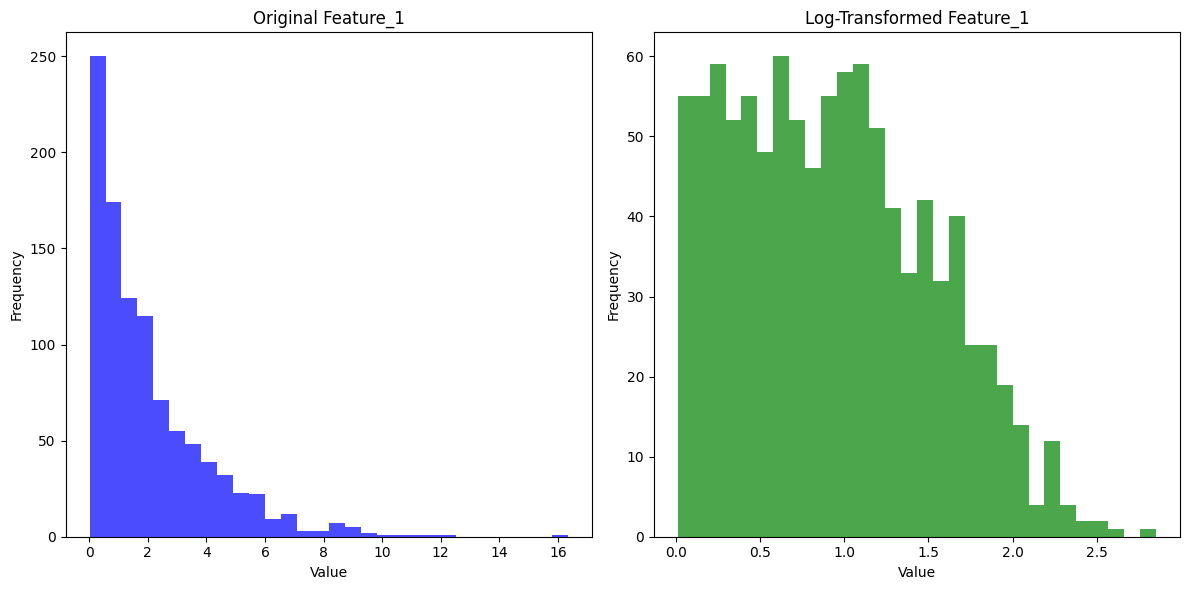

In [86]:
# Plot before and after transformation
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df["Feature_1"], bins=30, color="blue", alpha=0.7)
plt.title("Original Feature_1")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(df["Feature_1_log"], bins=30, color="green", alpha=0.7)
plt.title("Log-Transformed Feature_1")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


**4. Feature Selection:**

In [87]:
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

In [88]:
# Identify numerical features
numerical_features = df.select_dtypes(include=np.number).columns.tolist()

# Apply Isolation Forest
model = IsolationForest(contamination='auto', random_state=42)  # Adjust contamination if needed
df['outlier'] = model.fit_predict(df[numerical_features])

# Remove outliers
df_no_outliers = df[df['outlier'] == 1]

In [89]:
# Create a toy dataset
np.random.seed(42)  # Ensure reproducibility
X = np.linspace(0, 10, 100)
Y = 2 * X + 1 + np.random.normal(0, 1, 100)

# Add an outlier
X_outlier = 5
Y_outlier = 20
X = np.append(X, X_outlier)
Y = np.append(Y, Y_outlier)
X=X.reshape(-1,1)

# Fit a linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, Y)


LinearRegression()

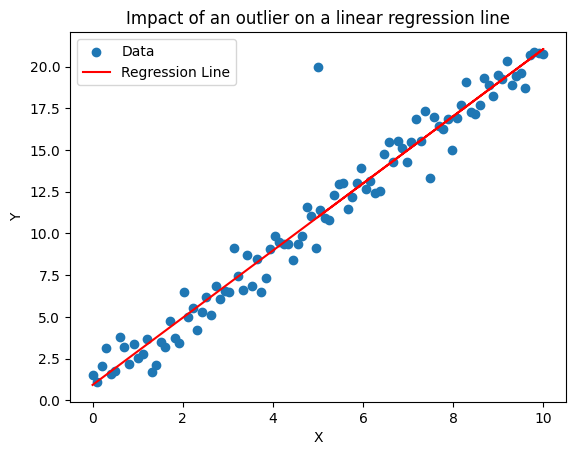

In [90]:
# Plot
plt.scatter(X, Y, label='Data')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Impact of an outlier on a linear regression line")
plt.legend()
plt.show()

In [91]:
!pip install ppscore

In [92]:
import pandas as pd
import ppscore as pps

In [93]:
# Calculate the PPS matrix
pps_matrix = pps.matrix(df)

# Display the PPS matrix
print("\nPPS Matrix:")
print(pps_matrix)



PPS Matrix:
                x              y   ppscore            case  is_valid_score  \
0       Feature_1      Feature_1  1.000000  predict_itself            True   
1       Feature_1      Feature_2  0.000000      regression            True   
2       Feature_1  Feature_1_log  0.995906      regression            True   
3       Feature_1        outlier  0.004505      regression            True   
4       Feature_2      Feature_1  0.000000      regression            True   
5       Feature_2      Feature_2  1.000000  predict_itself            True   
6       Feature_2  Feature_1_log  0.000000      regression            True   
7       Feature_2        outlier  0.000000      regression            True   
8   Feature_1_log      Feature_1  0.991230      regression            True   
9   Feature_1_log      Feature_2  0.000000      regression            True   
10  Feature_1_log  Feature_1_log  1.000000  predict_itself            True   
11  Feature_1_log        outlier  0.000000      reg

In [94]:
# Focus on the 'ppscore' column to identify predictive features
predictive_features = pps_matrix[pps_matrix['ppscore'] > 0.2] # Adjust threshold as needed

print("\nPredictive Features (PPS > 0.2):")
print(predictive_features)



Predictive Features (PPS > 0.2):
                x              y   ppscore            case  is_valid_score  \
0       Feature_1      Feature_1  1.000000  predict_itself            True   
2       Feature_1  Feature_1_log  0.995906      regression            True   
5       Feature_2      Feature_2  1.000000  predict_itself            True   
8   Feature_1_log      Feature_1  0.991230      regression            True   
10  Feature_1_log  Feature_1_log  1.000000  predict_itself            True   
15        outlier        outlier  1.000000  predict_itself            True   

                 metric  baseline_score  model_score                    model  
0                  None        0.000000     1.000000                     None  
2   mean absolute error        0.486771     0.001993  DecisionTreeRegressor()  
5                  None        0.000000     1.000000                     None  
8   mean absolute error        1.425234     0.012500  DecisionTreeRegressor()  
10                 

In [95]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Compare PPS and correlation
print("\nComparison:")



Correlation Matrix:
               Feature_1  Feature_2  Feature_1_log   outlier
Feature_1       1.000000   0.028084       0.940483 -0.422630
Feature_2       0.028084   1.000000       0.031423 -0.018615
Feature_1_log   0.940483   0.031423       1.000000 -0.299003
outlier        -0.422630  -0.018615      -0.299003  1.000000

Comparison:


In [96]:
# Example: Find features highly predictive according to PPS but with low correlation
for index, row in predictive_features.iterrows():
    feature_x = row['x']
    feature_y = row['y']
    pps_value = row['ppscore']
    correlation_value = correlation_matrix.loc[feature_x, feature_y]  # Access correlation
    print(f"Feature X: {feature_x}, Feature Y: {feature_y}")
    print(f"  PPS Score: {pps_value:.3f}, Correlation: {correlation_value:.3f}")
    if pps_value > 0.5 and abs(correlation_value) < 0.3:
        print(f"  High PPS, but low correlation - Potential non-linear relationship")


Feature X: Feature_1, Feature Y: Feature_1
  PPS Score: 1.000, Correlation: 1.000
Feature X: Feature_1, Feature Y: Feature_1_log
  PPS Score: 0.996, Correlation: 0.940
Feature X: Feature_2, Feature Y: Feature_2
  PPS Score: 1.000, Correlation: 1.000
Feature X: Feature_1_log, Feature Y: Feature_1
  PPS Score: 0.991, Correlation: 0.940
Feature X: Feature_1_log, Feature Y: Feature_1_log
  PPS Score: 1.000, Correlation: 1.000
Feature X: outlier, Feature Y: outlier
  PPS Score: 1.000, Correlation: 1.000
